In [44]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
    
metricFile = r"MaskedLanguageModeling\output_1672227650\metrics_MaskedLanguageModel_nSplits_3_limit_None.json"

with open(metricFile, 'r') as f:
    metrics = json.load(f)

# optimze previous lines to write directly to dataframe
f1s = pd.DataFrame()
f1errs = pd.DataFrame()
tprs = pd.DataFrame()
tprerrs = pd.DataFrame()
for key in metrics:
    for fpr in metrics[key]:
        f1s.loc[fpr.strip("fpr_"), key] = metrics[key][fpr]['f1_mean']
        f1errs.loc[fpr.strip("fpr_"), key] = metrics[key][fpr]['f1_std']
        tprs.loc[fpr.strip("fpr_"), key] = metrics[key][fpr]['tpr_mean']
        tprerrs.loc[fpr.strip("fpr_"), key] = metrics[key][fpr]['tpr_std']


In [45]:
def plotLineScatterWithErr(valueTable, errorTable, title, xlabel, ylabel, ax=None, legendLoc='lower right', figsize=(10, 8)):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    for key in valueTable:
        ax.errorbar(valueTable[key].index, valueTable[key], yerr=errorTable[key], marker="o", label=key, capsize=5)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()
    ax.legend(loc=legendLoc)

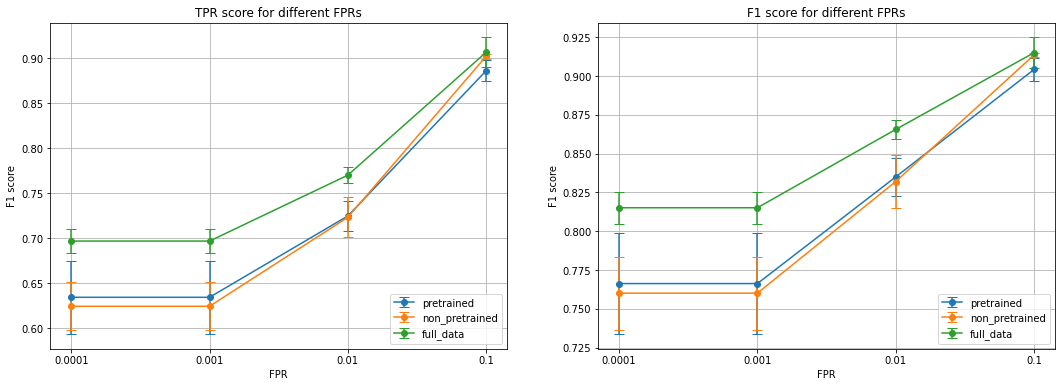

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plotLineScatterWithErr(tprs, tprerrs, "TPR score for different FPRs", "FPR", "F1 score", ax=ax[0])
plotLineScatterWithErr(f1s, f1errs, "F1 score for different FPRs", "FPR", "F1 score", ax=ax[1])

(-5.0, 100.0)

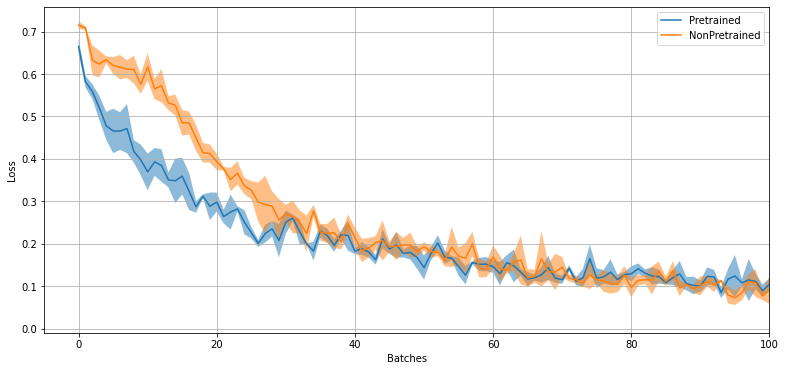

In [74]:
downstreamLossFolderNonPretrained = r"MaskedLanguageModeling\output_1672227650\donstreamTask_NonPreTrained"
downstreamLossFolderPretrained = r"MaskedLanguageModeling\output_1672227650\donstreamTask_PreTrained"
downstreamLossFolderFull = r"MaskedLanguageModeling\output_1672227650\donstreamTask_Full"

def trainingDumpFolder(folder):
    lossFiles = [file for file in os.listdir(folder) if file.endswith("Losses.npy")]
    losses = np.vstack([np.load(os.path.join(folder, losses)) for losses in lossFiles])
    lossesMean = np.mean(losses, axis=0)
    lossesStd = np.std(losses, axis=0)
    return lossesMean, lossesStd
    
meanPretrained, stdPretrained = trainingDumpFolder(downstreamLossFolderPretrained)
meanNonPretrained, stdNonPretrained = trainingDumpFolder(downstreamLossFolderNonPretrained)
meanFull, stdFull = trainingDumpFolder(downstreamLossFolderFull)

def plotLossesErrorShade(mean, std, ax=None, figsize=(10, 8)):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.plot(mean, label="mean")
    ax.fill_between(np.arange(len(mean)), mean-std, mean+std, alpha=0.5, label="std")
    

fig, ax = plt.subplots(1, 1, figsize=(13, 6))
plotLossesErrorShade(meanPretrained, stdPretrained, ax=ax)
plotLossesErrorShade(meanNonPretrained, stdNonPretrained, ax=ax)
#plotLossesErrorShade(meanFull, stdFull, ax=ax)
ax.set_xlabel("Batches")
ax.set_ylabel("Loss")
ax.grid()
# set legend for 0th, 1th elements
# for i in range(3):
#     ax.get_lines()[i].set_label(["Pretrained", "NonPretrained", "Full"][i])
ax.legend([ax.get_lines()[0], ax.get_lines()[1]], ["Pretrained", "NonPretrained"])
ax.set_xlim(-5, 100)